**Data Description: Processed Cucumber Production Data (2003-2024)**
The dataset is a consolidated summary of agricultural production statistics for cucumbers (pepino) in nine specific municipalities within Mexico, compiled annually from 2003 to 2024. The source of this data is the "Cierre de la Producción Agrícola" report provided by the Mexican Ministry of Agriculture and Rural Development (SADER) via its SIAP service.

The final, processed file, chile_unified.xlsx, represents a transformed and aggregated version of the original yearly reports.

Original Data Structure:
The raw data for each year is contained in separate Excel files. Within each file, the key metrics for cucumber production are detailed by municipality. The primary data columns include:

Municipio: The name of the municipality.

Superficie Sembrada: The total surface area where the crop was sown (measured in hectares).

Superficie Cosechada: The total surface area from which the crop was harvested (in hectares).

Produccion: The total production volume (in tons).

Rendimiento: The yield, or productivity, of the crop (tons per hectare).

PMR (Precio Medio Rural): The average rural price per ton.

Valor_Produccion: The total production value (calculated from production volume and price).

Data Processing Workflow:
The Python script performs several key data transformation steps to create the final unified dataset:

Filtering: The script focuses exclusively on a predefined list of nine common municipalities: ameca, autlán de navarro, el limón, san gabriel, tizapán el alto, tolimán, tuxcacuesco, tuxpan, and zapotiltic. All data from other municipalities is discarded.

Cleaning: Municipality names are standardized by converting them to lowercase and removing any leading or trailing whitespace. This ensures consistency for accurate matching and merging.

Aggregation and Reshaping: The core transformation is pivoting the data. Instead of a long-format table with yearly files, the script creates a single wide-format table.

The municipalities are listed as unique rows.

The agricultural metrics (like Production, Yield, Surface, etc.) for each year are converted into distinct columns. For example, the production data from 2003, 2004, and 2005 are reshaped into columns named Production_2003, Production_2004, and Production_2005.

The resulting chile_unified.xlsx file provides a clear, year-over-year comparison of cucumber production metrics for the selected municipalities, making it easy to analyze trends and performance over the 22-year period in a single view.

In [ ]:
from google.colab import files

# Upload multiple files
uploaded = files.upload()

# List the uploaded files
for filename in uploaded.keys():
    print("Uploaded file:", filename)

Saving chile 2022.xlsx to chile 2022.xlsx
Saving chile 2023.xlsx to chile 2023.xlsx
Saving chile 2024.xlsx to chile 2024.xlsx
Saving chile 2003.xlsx to chile 2003.xlsx
Saving chile 2004.xlsx to chile 2004.xlsx
Saving chile 2005.xlsx to chile 2005.xlsx
Saving chile 2006.xlsx to chile 2006.xlsx
Saving chile 2007.xlsx to chile 2007.xlsx
Saving chile 2008.xlsx to chile 2008.xlsx
Saving chile 2009.xlsx to chile 2009.xlsx
Saving chile 2010.xlsx to chile 2010.xlsx
Saving chile 2011.xlsx to chile 2011.xlsx
Saving chile 2012.xlsx to chile 2012.xlsx
Saving chile 2013.xlsx to chile 2013.xlsx
Saving chile 2014.xlsx to chile 2014.xlsx
Saving chile 2015.xlsx to chile 2015.xlsx
Saving chile 2016.xlsx to chile 2016.xlsx
Saving chile 2017.xlsx to chile 2017.xlsx
Saving chile 2018.xlsx to chile 2018.xlsx
Saving chile 2019.xlsx to chile 2019.xlsx
Saving chile 2020.xlsx to chile 2020.xlsx
Saving chile 2021.xlsx to chile 2021.xlsx
Uploaded file: chile 2022.xlsx
Uploaded file: chile 2023.xlsx
Uploaded file:

In [ ]:
import pandas as pd

# Create a list of the 'chile' filenames from 2003 to 2024
# This is a more efficient way than typing them all out.
file_list = [f'chile {year}.xlsx' for year in range(2003, 2025)]

# List to store sets of municipalities for each year
municipalities_per_year = []

print("Processing your 'chile' files...")

try:
    for file in file_list:
        # Read the Excel file
        df = pd.read_excel(file, header=None)

        # Extract municipality names from the 3rd column (index 2), starting from row 11 (index 10)
        df_municipalities = df.iloc[10:, 2]

        # Clean the data: remove empty rows, strip whitespace, and convert to lowercase
        df_municipalities = df_municipalities.dropna().str.strip().str.lower()

        # Add the unique set of municipalities for the year to our list
        municipalities_per_year.append(set(df_municipalities))

    # Find the intersection of all sets: municipalities that are present in every single year
    common_municipalities = set.intersection(*municipalities_per_year)

    print("\n--- Process Complete ---")
    print("Municipalities that appear in all years:")
    # Print the final list, sorted alphabetically
    print(sorted(list(common_municipalities)))

except FileNotFoundError as e:
    print(f"\nERROR: Could not find a file. Please check the filenames.")
    print(f"Details: {e}")
except Exception as e:
    print(f"\nAn unexpected error occurred: {e}")

Processing your 'chile' files...

--- Process Complete ---
Municipalities that appear in all years:
['atoyac', 'autlán de navarro', 'ayotlán', 'cihuatlán', 'cuautitlán de garcía barragán', 'cuquío', 'el limón', 'encarnación de díaz', 'jocotepec', 'la barca', 'la huerta', 'lagos de moreno', 'mascota', 'mexticacán', 'ojuelos de jalisco', 'puerto vallarta', 'san gabriel', 'sayula', 'teocaltiche', 'teocuitatlán de corona', 'tizapán el alto', 'tolimán', 'tomatlán', 'tuxcacuesco', 'yahualica de gonzález gallo']


In [ ]:
import pandas as pd

# List of the "chile" files that you have already uploaded
# The code now looks for the correct filenames.
file_list = [f'chile {year}.xlsx' for year in range(2003, 2025)]

# A predefined list of the common municipalities to filter by
common_municipalities = ['ameca', 'autlán de navarro', 'el limón', 'san gabriel',
                         'tizapán el alto', 'tolimán', 'tuxcacuesco', 'tuxpan', 'zapotiltic']

# Initialize the final DataFrame with the municipalities
final_df = pd.DataFrame({'Municipality': common_municipalities})

print("Processing the 'chile' files that are already uploaded...")

try:
    # Loop through each file in the list
    for file in file_list:
        # Extract the year from the filename
        year = file.split()[1].split('.')[0]

        # Read the current Excel file from the Colab environment
        df = pd.read_excel(file, header=None)

        # Extract the relevant data rows and columns
        df_municipalities = df.iloc[10:, 2:9]

        # Check the number of columns and assign names automatically
        num_cols = df_municipalities.shape[1]
        if num_cols == 7:
            df_municipalities.columns = ['Municipality', 'Surface', 'Sown', 'Harvested', 'Production', 'Yield', 'PMR']
        elif num_cols == 8:
            df_municipalities.columns = ['Municipality', 'Surface', 'Sown', 'Harvested', 'Production', 'Yield', 'PMR', 'Production_Value']
        else:
            raise ValueError(f"File {file} has an unexpected format with {num_cols} columns.")

        # Clean and filter the data
        df_municipalities['Municipality'] = df_municipalities['Municipality'].str.strip().str.lower()
        df_municipalities = df_municipalities[df_municipalities['Municipality'].isin(common_municipalities)]

        # Prepare for merging by setting the index and renaming columns with the year
        df_municipalities = df_municipalities.set_index('Municipality')
        df_municipalities = df_municipalities.rename(columns=lambda col: f"{col}_{year}")

        # Join the year's data with the main DataFrame
        final_df = final_df.set_index('Municipality').join(df_municipalities, how='left').reset_index()

    # Print the first 5 rows of the final, merged DataFrame
    print("\n--- Final Merged Data (First 5 Rows) ---")
    print(final_df.head())

except FileNotFoundError as e:
    print(f"\nERROR: A file was not found. Please run the cell with '!ls' to verify the exact filenames.")
    print(f"Missing file detail: {e}")

Processing the 'chile' files that are already uploaded...

--- Final Merged Data (First 5 Rows) ---
        Municipality Surface_2003 Sown_2003 Harvested_2003 Production_2003  \
0              ameca        25.36     25.36              0          441.96   
1  autlán de navarro          261       261              0            5742   
2           el limón           30        30              0             450   
3        san gabriel          158       158              0            2357   
4    tizapán el alto           40        40              0             440   

  Yield_2003 PMR_2003 Surface_2004 Sown_2004 Harvested_2004  ...  \
0      17.43  6165.94         27.5      21.5              6  ...   
1         22     5500          296       293              3  ...   
2         15     4000           21        21              0  ...   
3      14.92   5825.2          145       145              0  ...   
4         11     4000           43        43              0  ...   

  Harvested_2023 Produ

In [ ]:
from google.colab import files

# Save the final DataFrame to an Excel file
# The 'index=False' part prevents pandas from writing the DataFrame index as a column.
output_filename = "chile_unified.xlsx"
final_df.to_excel(output_filename, index=False)

# Download the newly created Excel file to your computer
files.download(output_filename)

print(f"The file '{output_filename}' has been saved and is now being downloaded.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The file 'chile_unified.xlsx' has been saved and is now being downloaded.


--- 1. Initial Data Inspection ---
Shape of the dataset (rows, columns): (9, 133)

First 5 rows of the dataset:
        Municipality  Surface_2003  Sown_2003  Harvested_2003  \
0              ameca         25.36      25.36               0   
1  autlán de navarro        261.00     261.00               0   
2           el limón         30.00      30.00               0   
3        san gabriel        158.00     158.00               0   
4    tizapán el alto         40.00      40.00               0   

   Production_2003  Yield_2003  PMR_2003  Surface_2004  Sown_2004  \
0           441.96       17.43   6165.94          27.5       21.5   
1          5742.00       22.00   5500.00         296.0      293.0   
2           450.00       15.00   4000.00          21.0       21.0   
3          2357.00       14.92   5825.20         145.0      145.0   
4           440.00       11.00   4000.00          43.0       43.0   

   Harvested_2004  ...  Harvested_2023  Production_2023  Yield_2023  PMR_2023  \
0

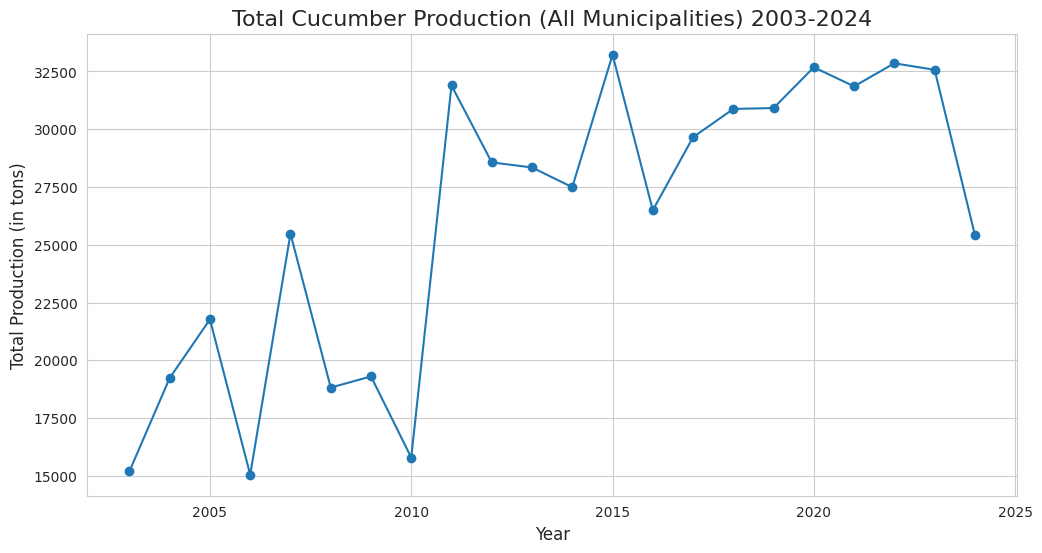

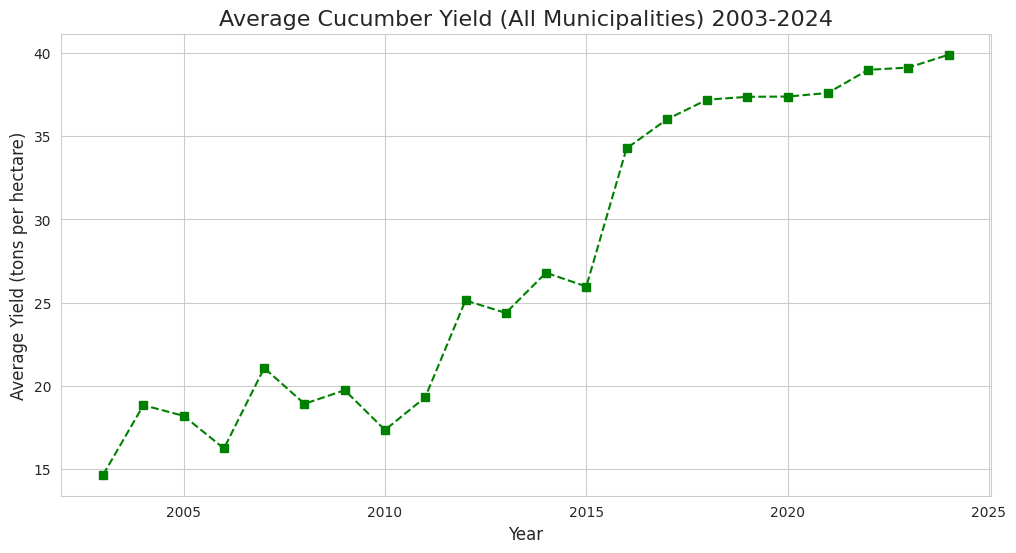


--- 3. Analyzing Performance by Municipality ---


/tmp/ipython-input-995479520.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average_Production', y='Municipality', data=top_municipalities, palette='viridis')


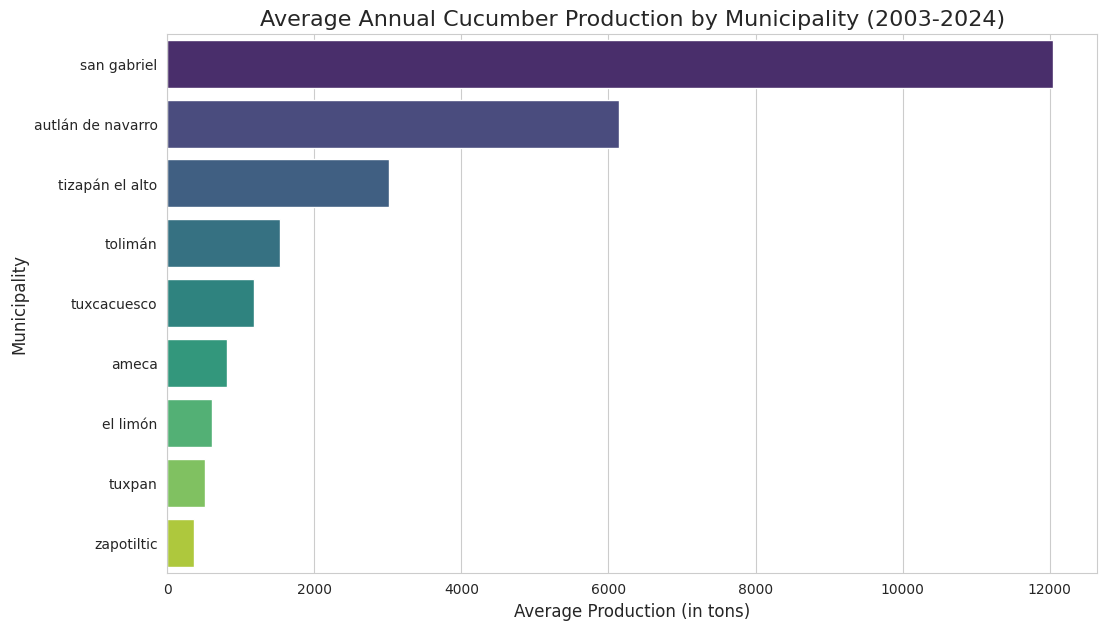


--- 4. Deep Dive into a Single Municipality ---


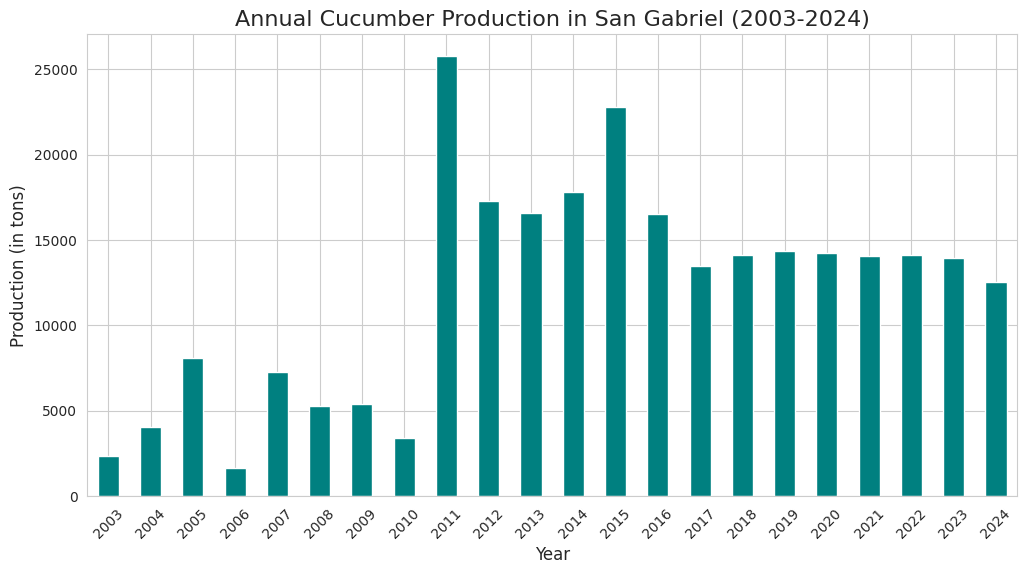

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load and Inspect the Data ---

# Set plotting style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

try:
    # Load the unified Excel file into a pandas DataFrame
    file_path = 'chile_unified.xlsx'
    df = pd.read_excel(file_path)

    print("--- 1. Initial Data Inspection ---")
    print("Shape of the dataset (rows, columns):", df.shape)
    print("\nFirst 5 rows of the dataset:")
    print(df.head())

    # Display a concise summary of the dataframe, including data types and non-null values
    print("\nData summary and types:")
    df.info()

except FileNotFoundError:
    print(f"ERROR: The file '{file_path}' was not found.")
    print("Please make sure the file exists in your Colab environment before running this script.")
    # Exit the script if the file isn't found
    exit()


# --- Step 2: Analyze Production and Yield Trends Over Time ---

print("\n--- 2. Analyzing Trends from 2003-2024 ---")

# Extract year columns for 'Production' and 'Yield'
years = range(2003, 2025)
production_cols = [f'Production_{year}' for year in years]
yield_cols = [f'Yield_{year}' for year in years]

# Calculate total production per year across all municipalities
total_production_per_year = df[production_cols].sum()
# Clean up the index to be just the year number
total_production_per_year.index = years

# Calculate the average yield per year across all municipalities
average_yield_per_year = df[yield_cols].mean()
average_yield_per_year.index = years

# Plot Total Production Over Time
plt.figure()
total_production_per_year.plot(kind='line', marker='o', linestyle='-')
plt.title('Total Cucumber Production (All Municipalities) 2003-2024', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Production (in tons)', fontsize=12)
plt.grid(True)
plt.show()

# Plot Average Yield Over Time
plt.figure()
average_yield_per_year.plot(kind='line', marker='s', linestyle='--', color='green')
plt.title('Average Cucumber Yield (All Municipalities) 2003-2024', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Yield (tons per hectare)', fontsize=12)
plt.grid(True)
plt.show()


# --- Step 3: Identify Top Performing Municipalities ---

print("\n--- 3. Analyzing Performance by Municipality ---")

# Calculate the mean production for each municipality across all years
df['Average_Production'] = df[production_cols].mean(axis=1)

# Sort municipalities by their average production
top_municipalities = df.sort_values(by='Average_Production', ascending=False)

# Plot Average Production by Municipality
plt.figure(figsize=(12, 7))
sns.barplot(x='Average_Production', y='Municipality', data=top_municipalities, palette='viridis')
plt.title('Average Annual Cucumber Production by Municipality (2003-2024)', fontsize=16)
plt.xlabel('Average Production (in tons)', fontsize=12)
plt.ylabel('Municipality', fontsize=12)
plt.show()


# --- Step 4: Deep Dive into a Single Municipality's Performance ---

print("\n--- 4. Deep Dive into a Single Municipality ---")
# You can change this to any municipality from your list
selected_municipality = 'san gabriel'

# Filter the data for the selected municipality
municipality_data = df[df['Municipality'] == selected_municipality]

if not municipality_data.empty:
    # Extract its production data over the years
    production_trend = municipality_data[production_cols].iloc[0]
    production_trend.index = years

    # Plot the production trend for the single municipality
    plt.figure()
    production_trend.plot(kind='bar', color='teal')
    plt.title(f'Annual Cucumber Production in {selected_municipality.title()} (2003-2024)', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Production (in tons)', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()
else:
    print(f"Municipality '{selected_municipality}' not found in the dataset.")